In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score


In [59]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Urban\dataset\water_potability.csv')
df.fillna(df.mean())

print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [60]:
print(df.shape)
print(df.columns)

(3276, 10)
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [61]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


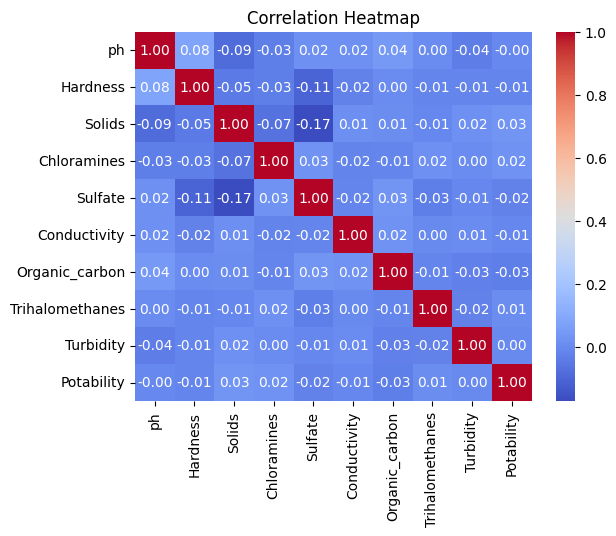

In [62]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

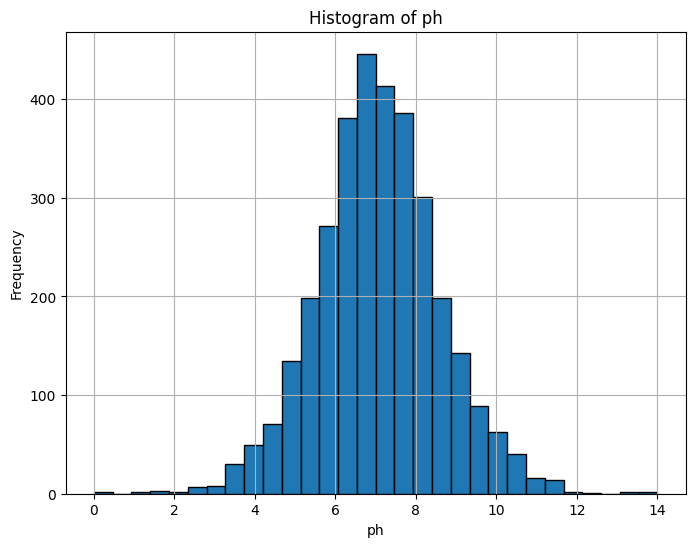

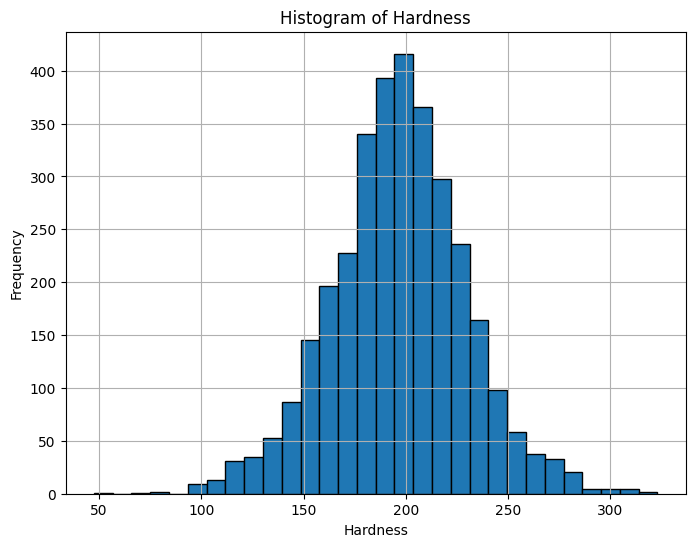

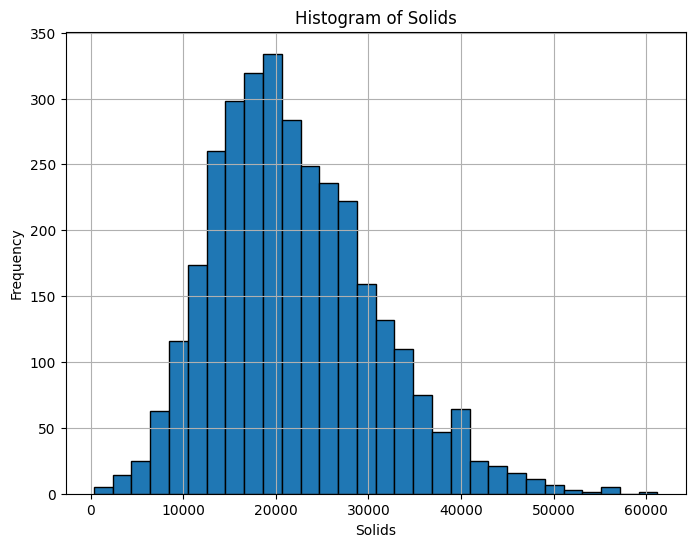

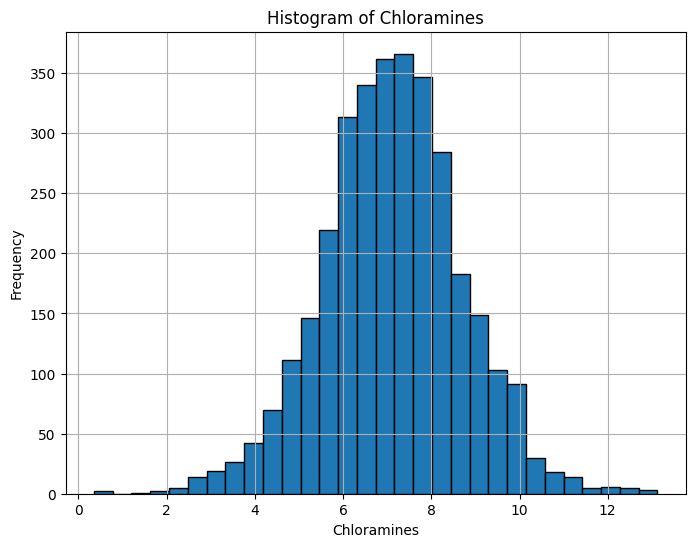

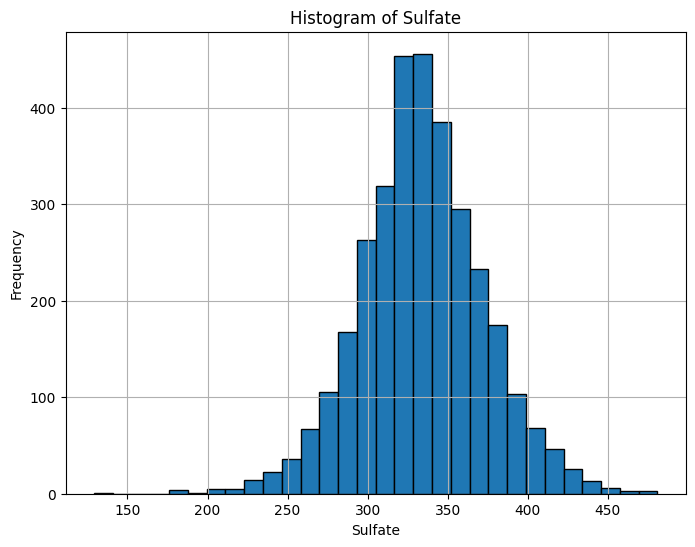

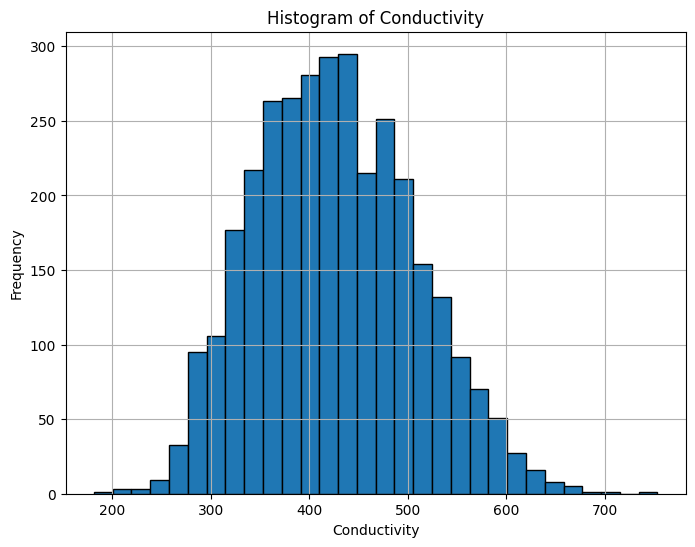

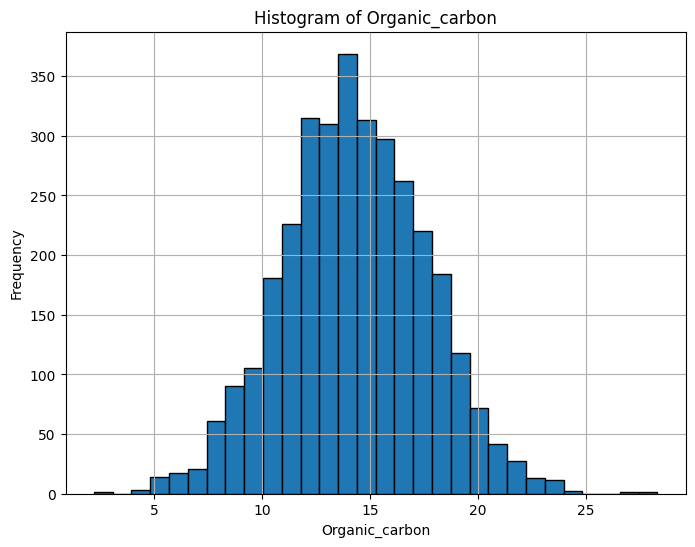

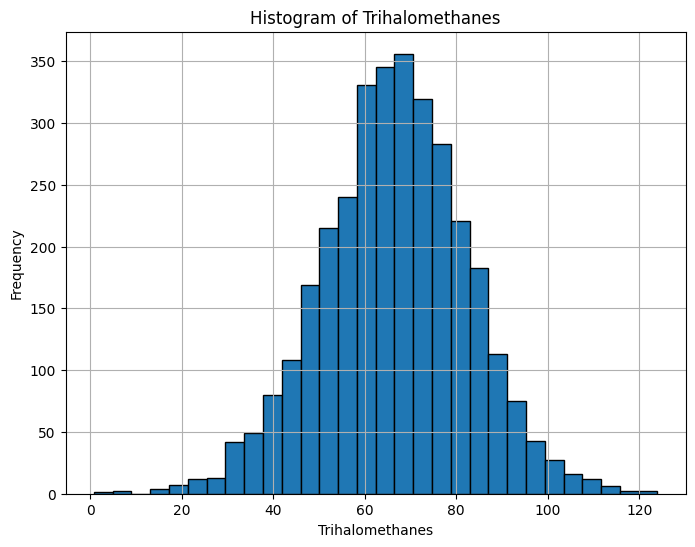

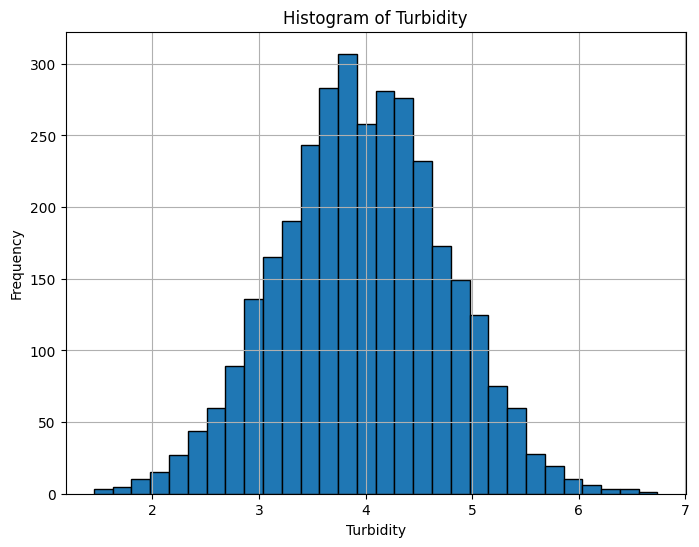

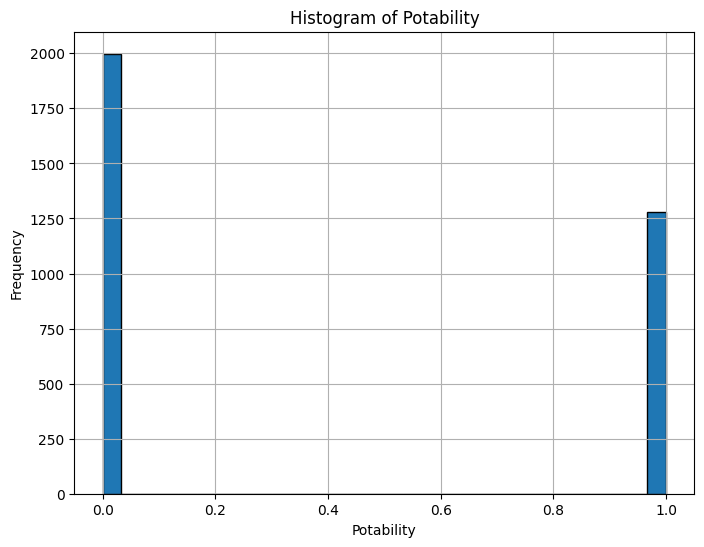

In [63]:
# --------------------------------------
# Plot histogram for each column (checking for gaussian distribution)
# --------------------------------------

for col in df.columns:
    # Plot histogram for each column
    plt.figure(figsize=(8, 6))
    plt.hist(data[col], bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.grid(True)
    plt.show()

In [65]:
# --------------------------------------
# Separate data into features and target variable 
# --------------------------------------
scaler = StandardScaler()

X = df.drop('Potability', axis=1)
X = scaler.fit_transform(X)
y = df['Potability']

#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("\n")


(2293, 9)
(2293,)
(983, 9)
(983,)




In [70]:
# --------------------------------------
# Train the model
# --------------------------------------

forest_reg = RandomForestRegressor(n_estimators=150, random_state=42,)
forest_reg.fit(X_train, y_train)



RandomForestRegressor(n_estimators=150, random_state=42)

In [71]:

forest_scores = cross_val_score(forest_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=10)

print(forest_scores)


[-0.21109971 -0.22403111 -0.2001171  -0.21480679 -0.24554391 -0.21289976
 -0.21723358 -0.22030471 -0.20504512 -0.23141426]


In [74]:
print(y_test.unique())

[0 1]


In [77]:
# accuracy score
forest_pred_prob = forest_reg.predict(X_test)
forest_pred = (forest_pred_prob > 0.4).astype(int)
forest_acc = accuracy_score(y_test, forest_pred)
print(forest_acc)

0.641912512716175


Text(0.5, 1.0, 'Threshold vs Accuracy')

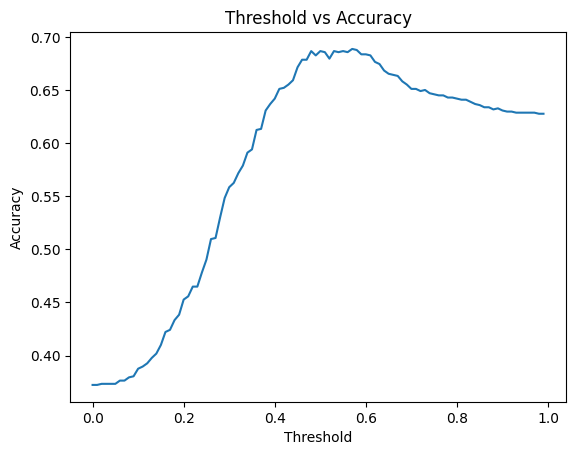

In [78]:
# finsding the right threshold
thresholds = np.arange(0, 1, 0.01)
acc_scores = []
for t in thresholds:
    forest_pred = (forest_pred_prob > t).astype(int)
    acc = accuracy_score(y_test, forest_pred)
    acc_scores.append(acc)

plt.plot(thresholds, acc_scores)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')

In [81]:
# best threshold
best_threshold = thresholds[np.argmax(acc_scores)]
print('Best Threshold:', best_threshold)


forest_pred_prob = forest_reg.predict(X_test)
forest_pred = (forest_pred_prob > 0.5700000000000001).astype(int)
forest_acc = accuracy_score(y_test, forest_pred)
print(forest_acc)

Best Threshold: 0.5700000000000001
0.688708036622584
